# Optimization Algorithms

## Mini-Batch Gradient Descent
- Recall that **vectorization** allows you to efficiently compute on $m$ examples.
- When using mini-batch gradient descent, we divide training sets into mini-batches.
- Recall on notations:
    - $X^{(i)}$ represents the $i^{th}$ training sample.
    - $z^{[l]}$ represents the linear output of the $l^{th}$ layer.
    - Here, we use $X^{\{ t \}}$ and $y^{\{ t \}}$ to represent the $t^{th}$ mini-batch of training examples and targets.
    
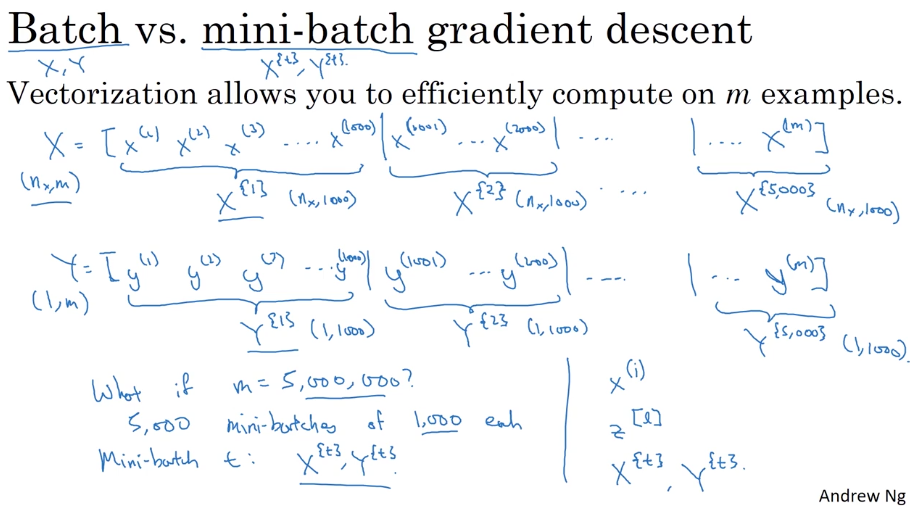

- Mini-batch Gradient Descent
    - Let # mini-batches = $N_{batch}$
    - Let # examples in each mini-batch = $n_{t}$
    - for $t = 1, ..., N_{batch}$:
        - Forward propagation on $X^{\{ t \}}$ (vectorized implementation)
        - Compute cost $J^{\{ t \}} = \frac{1}{n_{t}} \sum_{i=1}^{n_{t}} L(\hat y^{(i)}, y^{(i)}) + \frac{\lambda}{2 n_{t}} \sum_{l=1}^{L} \| W^{[l]} \| ^{2}_{F}$ (assuming using $l_{2}$ regularization)
        - Backpropagation to compute gradients with respect to $J^{\{ t \}}$.
        - Update parameters
            - $W^{[l]} := W^{[l]} - \alpha dW^{[l]}$
            - $b^{[l]} := b^{[l]} - \alpha db^{[l]}$
    - Above is **1 epoch**, i.e. one pass through the training set.
    
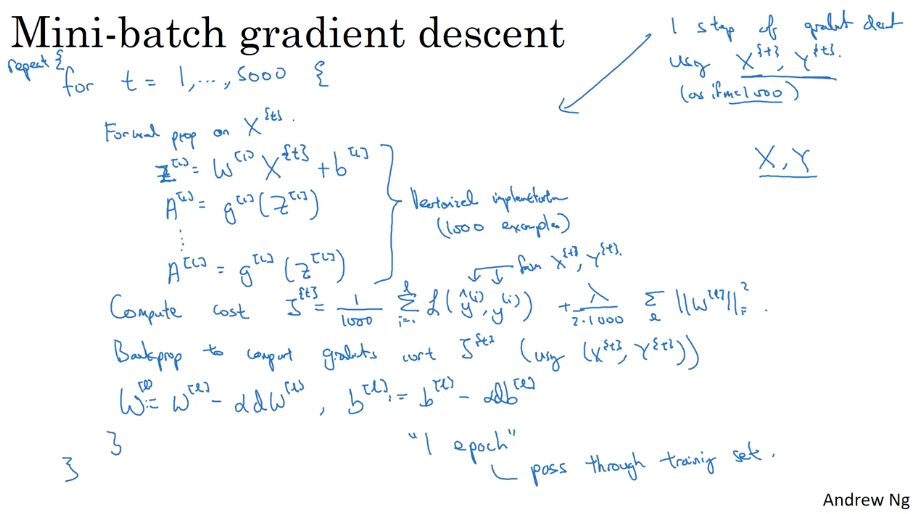

## Understanding Mini-Batch Gradient Descent
- Choosing your Mini-batch size
    - If mini-batch size = $m$: Batch Gradient Descent, i.e. $(X^{\{ t \}}, Y^{\{ t \}}) = (X, Y)$
    - If mini-batch size = $1$: Stochastic Gradient Descent, i.e. every single example is a mini-batch.
    
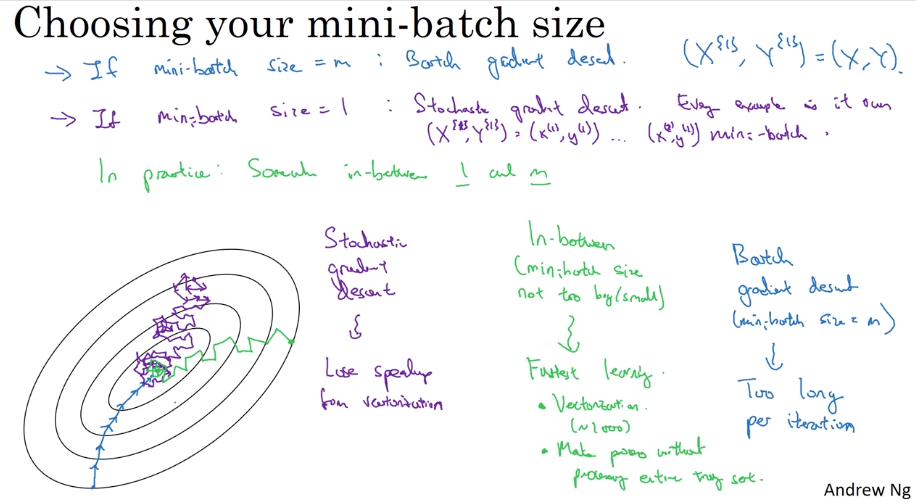

- General Guidelines
    - If small training set ($m \leq 2000$): use Batch Gradient Descent
    - Typicall mini-batch sizes:
        - $2^{6} = 64, 2^{7} = 128, 2^{8} = 256, 2^{9} = 512$
    - Make sure that all mini-batch $(X^{\{ t \}}, Y^{\{ t \}})$ fit in CPU/GPU memory.
    - Mini-batch size could be another hyperparameter to search over - just try using several different $2^{n}$ and see which one makes the optimization process most efficient.

## Exponentially Weighted Averages
- Let $\theta$ be a random variable
    - $v_{t} = \beta v_{t-1} + (1 - \beta) \theta_{t}$
        - $v_{t}$ is approximately the average over the last $\frac{1}{1 - \beta}$ data points for $\theta$.
        
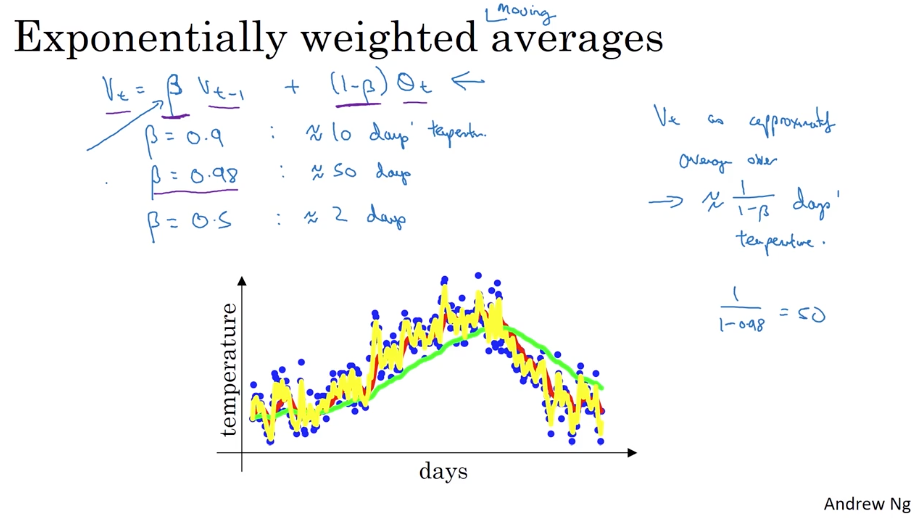

## Understanding Exponentially Weighted Averages

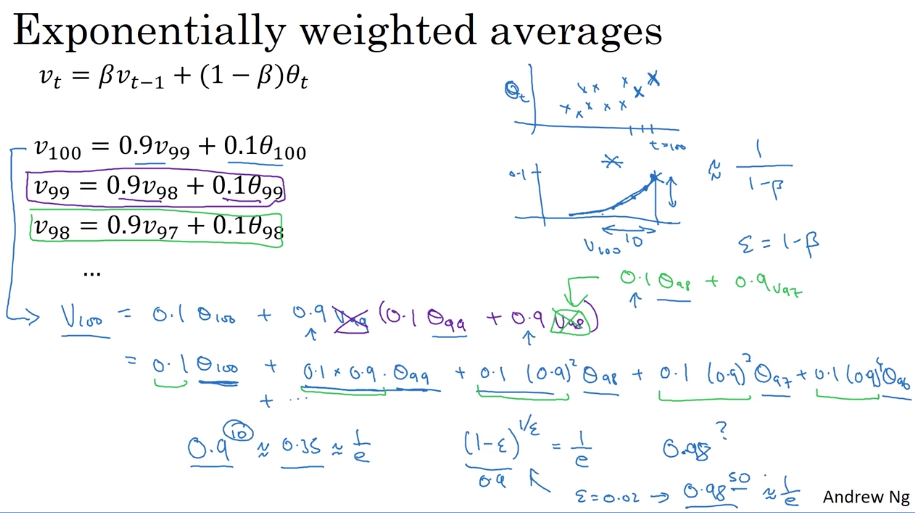

- Implementing Exponentially Weighted Averages
    - Initiate $v_{\theta} = 0$
    - Repeat:
        - Get next $\theta_{t}$
        - $v_{\theta} := \beta v_{\theta} + (1 - \beta) \theta_{t}$
- The advantage of Exponentially Weighted Average over normal Moving Average is that it only requires storing 1 single variable and is thus computationally more efficient.        

## Bias Correction in Exponentially Weighted Averages
- If we initiate $v_{0} = 0$, using $v_{t}$ as the estimate of the average of the last $\frac{1}{1 - \beta}$ data points is not really accurate during the initial phase, as $v_{t}$ starts off with small values.
- To correct this bias, we instead use $\frac{v_{t}}{1 - \beta^{t}}$ as the estimate of the average of the last $\frac{1}{1 - \beta}$ data points.

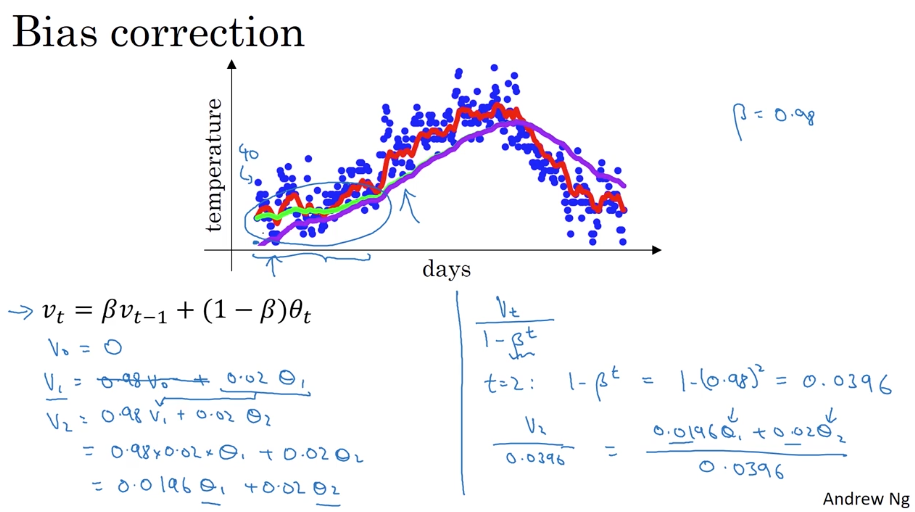

## Gradient Descent with Momentum
- In one sentence, Gradient Descent with Momentum is the combination of the standard Gradient Descent and the Exponentially Weighted Averages.
    - We use Exponentially Weighted Averages to smooth-out the vertical oscilations of the gradients.
    - The algorithm can then move faster on the horizontal direction and reach the local minimum more efficiently.
    
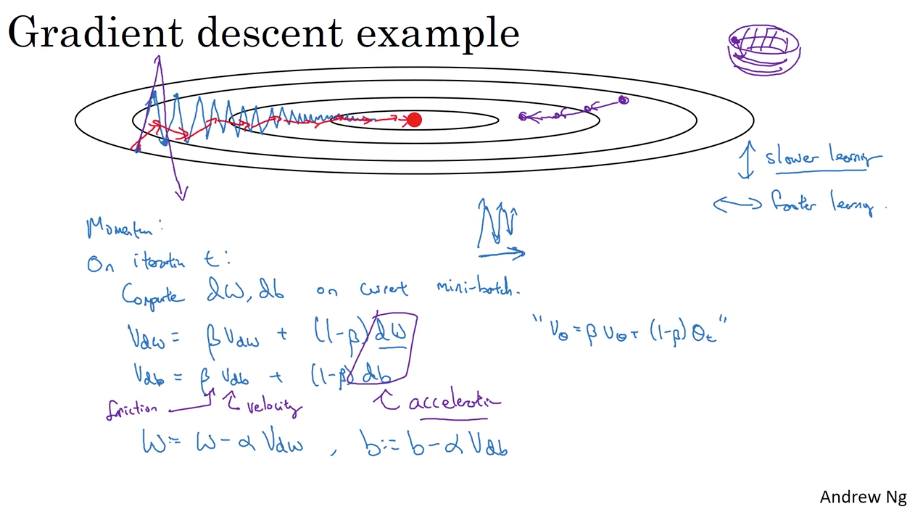
    
- Implementation Details:
    - Initialize $v_{dW} = 0, v_{db} = 0$
    - On iteration $t$:
        - Compute $dW, db$ on current mini-batch (or the entire training set if not using mini-batch GD)
        - $v_{dW} = \beta v_{dW} + (1 - \beta) dW$
            - Exponentially Weighted Average of $dW$
        - $v_{db} = \beta v_{db} + (1 - \beta) db$
            - Exponentially Weighted Average of $db$
        - $W := W - \alpha v_{dW}$
        - $b := b - \alpha v_{db}$
    - Hyperparameters: $\alpha, \beta$
        - Usually, $\beta = 0.9$ is a pretty robust value, approximately corresponding to the exponentially weighted average of the last 10 gradients.
    - In practice, people usually DONNOT bother to apply bias correction for GD with Momentum.
    - Sometimes, people will omit the $(1 - \beta)$ term, making it $v_{dW} = \beta v_{dW} + dW$, but this may result in scaling of $dW$ (and similarly for $db$), so why not just use the original formula above.

## RMSprop
- Here, assume that we have two parameters $W$ and $b$, while the oscillaton on the direction of $b$ is really large.
- we want to the optimization process to go slower on the $b$ direction but faster on the $W$ direction.
- Implementation Details:
    - Initialize $s_{dW} = 0, s_{db} = 0$
    - On iteration $t$:
        - Compute $dW, db$ on current mini-batch (or the entire training set if not using mini-batch GD)
        - $s_{dW} = \beta s_{dW} + (1 - \beta) dW^{2}$
            - Exponentially Weighted Average of $dW^{2}$
        - $s_{db} = \beta s_{db} + (1 - \beta) db^{2}$
            - Exponentially Weighted Average of $db^{2}$
        - $W := W - \alpha \frac{s_{dW}}{\sqrt {s_{dW}}}$
        - $b := b - \alpha \frac{s_{db}}{\sqrt {s_{db}}}$
            - The intuition is that since $db$ is larger, ${s_{db}}$ is larger, and dividing by ${s_{db}}$ making the changes in the $b$ direction smoother.
- In practice, we usually add a small $\epsilon$ to the denominator to avoid numerical problems during calculations.
    - $W := W - \alpha \frac{s_{dW}}{\sqrt {s_{dW}} + \epsilon}$
    - $b := b - \alpha \frac{s_{db}}{\sqrt {s_{db}} + \epsilon}$
    
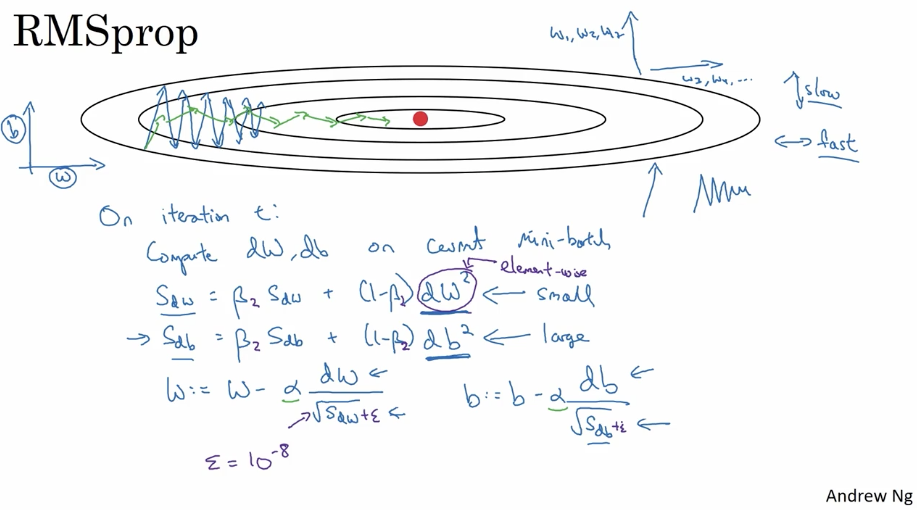

## Adam Optimization Algorithm
- The Adam (Adaptive Momentum Estimation) optimization algorithm takes momentum and RMSprop together.
- Implementation Details:
    - Initialize $v_{dW} = 0, s_{dW} = 0, v_{db} = 0, s_{db} = 0$
    - On iteration $t$:
        - Compute $dW, db$ on current mini-batch (or the entire training set if not using mini-batch GD)
        - Implement Momentum
            - $v_{dW} = \beta_{1} v_{dW} + (1 - \beta_{1}) dW$
            - $v_{db} = \beta_{1} v_{db} + (1 - \beta_{1}) db$
        - Implement RMSprop
            - $s_{dW} = \beta_{2} s_{dW} + (1 - \beta_{2}) dW^{2}$
            - $s_{db} = \beta_{2} s_{db} + (1 - \beta_{2}) db^{2}$
        - Implement Bias Correction
            - $v_{dW}^{corrected} = \frac{v_{dw}}{(1 - \beta_{1}^{t})}$
            - $v_{db}^{corrected} = \frac{v_{db}}{(1 - \beta_{1}^{t})}$
            - $s_{dW}^{corrected} = \frac{s_{dw}}{(1 - \beta_{2}^{t})}$
            - $s_{db}^{corrected} = \frac{s_{db}}{(1 - \beta_{2}^{t})}$
        - $W := W - \alpha \frac{v_{dW}^{corrected}}{\sqrt {s_{dW}^{corrected}} + \epsilon}$
        - $b := b - \alpha \frac{v_{db}^{corrected}}{\sqrt {s_{db}^{corrected}} + \epsilon}$
- Hyperparameter choice:
    - $\alpha$: needs to be tuned
    - $\beta_{1}$: 0.9
    - $\beta_{2}$: 0.999
    - $\epsilon$: $10^{-8}$

## Learning Rate Decay
- We want to take larger steps at the initial phase of learning but smaller steps when learning is approaching convergence.
- Implement Learning Rate Decay
    - Recall: 1 epoch = 1 pass through the training set
    - $\alpha = \frac{1}{1 + decay\_rate * epoch\_num} \alpha_{0}$
- Other Learning Rate Decay methods

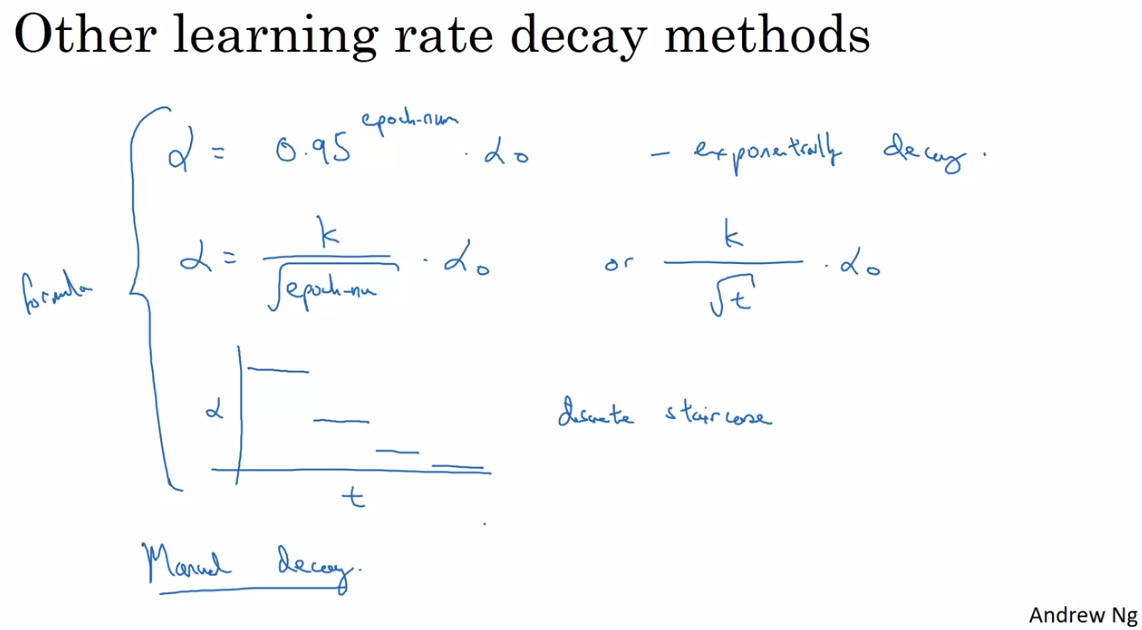

## The Problem of Local Optima
- People used to worry about learning getting stuck at local optima, where the gradients are 0.
- However, in high dimensional spaces, most points where gradients are 0 are actually **saddle points** instead of local optima.

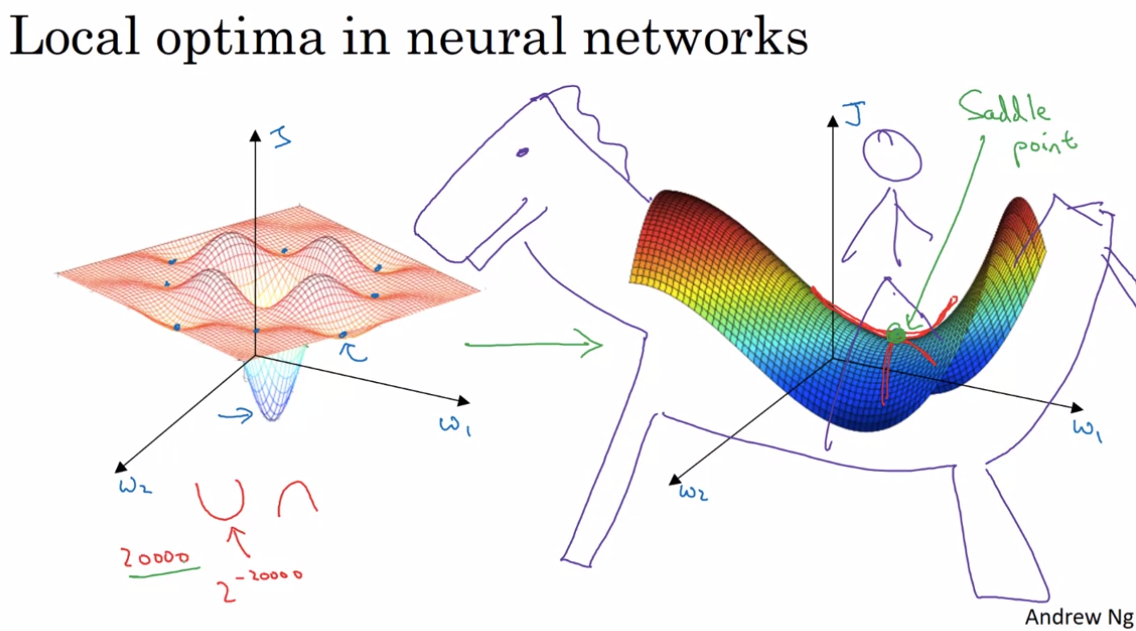

- It turns out that the real problem for deep learning is the **Problem of Plateaus**.

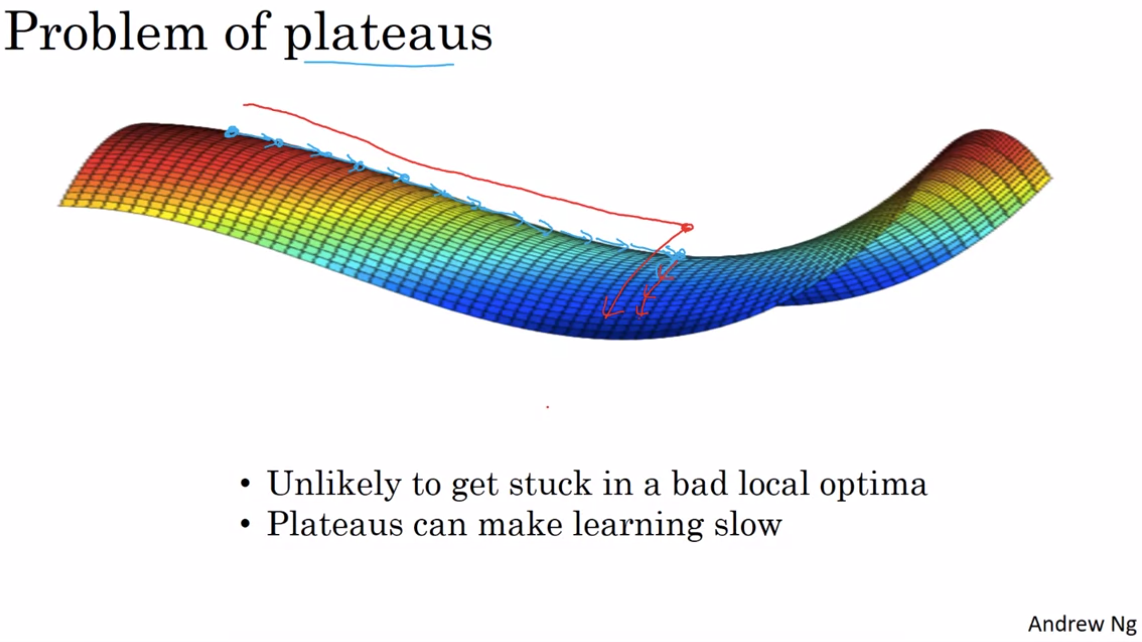